In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly
import warnings

import yfinance as yf

# Load stock info

In [6]:
# Download stock info
# stock_info = yf.download("^HSI", start="2000-01-01", end="2003-06-15")
stock_info = yf.download("AAPL", start="2000-01-01", end="2003-06-15")
# stock_info = yf.download("AAPL", start="2000-01-01", end="2021-08-16")
# stock_info = yf.download("NVDA", start="2021-01-01", end="2021-08-16")
stock_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777850,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400
...,...,...,...,...,...,...
2003-06-09,0.302500,0.304286,0.296964,0.299821,0.254831,259952000
2003-06-10,0.301607,0.308750,0.299107,0.306786,0.260751,176646400
2003-06-11,0.306250,0.312679,0.300179,0.311607,0.264848,225114400


In [7]:
# Load the stock close data
stock_close_data = pd.DataFrame(stock_info["Close"])
stock_close_data

,Close
Date,
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393
...,...
2003-06-09,0.299821
2003-06-10,0.306786
2003-06-11,0.311607


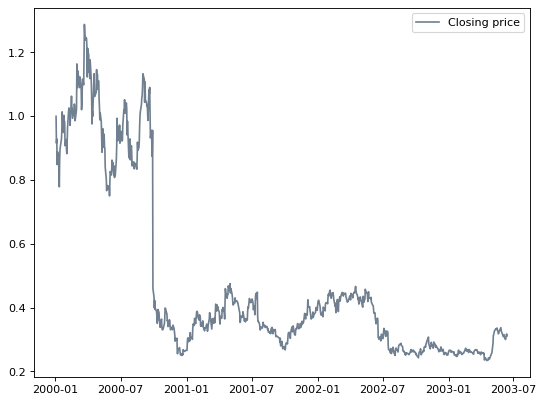

In [8]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.legend()
plt.show()

## Find Trend

example: degree = 1

In [9]:
# See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
degree = 1
# smaller degree -> take trend with larger time scale

X = np.array(stock_close_data.reset_index().index)
Y = stock_close_data["Close"].to_numpy()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", np.RankWarning)
    poly_fit = np.poly1d(np.polyfit(X, Y, degree))

stock_trend = pd.DataFrame(poly_fit(X))
stock_trend.index = stock_close_data.index
stock_trend

,0
Date,
2000-01-03,0.839303
2000-01-04,0.838463
2000-01-05,0.837623
2000-01-06,0.836783
2000-01-07,0.835944
...,...
2003-06-09,0.117150
2003-06-10,0.116310
2003-06-11,0.115471


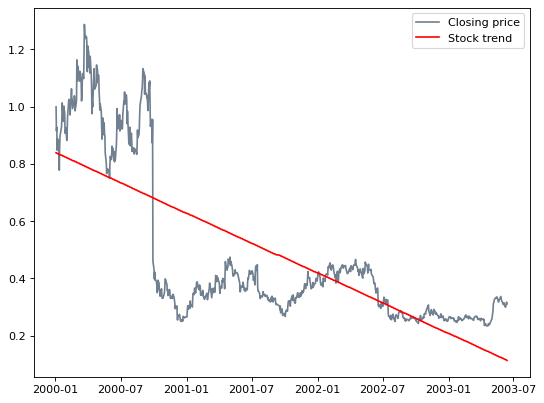

In [10]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(stock_trend, label="Stock trend", color='red')
plt.legend()
plt.show()

exmaple: degree = 20

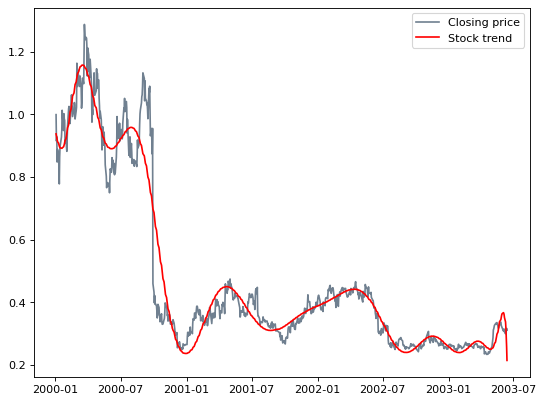

In [11]:
# See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
degree = 20
# smaller degree -> take trend with larger time scale

X = np.array(stock_close_data.reset_index().index)
Y = stock_close_data["Close"].to_numpy()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", np.RankWarning)
    poly_fit = np.poly1d(np.polyfit(X, Y, degree))

stock_trend = pd.DataFrame(poly_fit(X))
stock_trend.index = stock_close_data.index

# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(stock_trend, label="Stock trend", color='red')
plt.legend()
plt.show()